# Mathias Babin - P2 Continuous Control Train

This is my implementation for solving the P2 Continuous Control project for [Udacity's Deep Reinforcement Learning course](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893). Details on the project are provided in the **README** for this repository. The purpose of this notebook is to **train** an Agent to solve this environment. If you wish to watch a **finished** agent perform in this enviroment, please go to the **CC_Test** notebook included in this repository.


### 1. Setting up the Environment

Running the following cell gaurentees that both [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/) have been installed correctly. 

In [1]:
from unityagents import UnityEnvironment
import numpy as np

This project was built and tested on a 64-bit OSX system. To make this application run on a different OS please change the file path in the next cell to one of the following:

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

Note that all of these files **_should_** already be included in the repository as .zip files, simply extract the one that matches your current OS (OSX .app already extracted).

The next cell simply sets up the Enviroment. **_IMPORTANT:_**  If the following cell opens a Unity Window that crashes, this is because the rest of the cells in the project are not being executed fast enough. To avoid this, please select **Restart & Run All** under **Kernal**. This will execute all the cells in the project.

In [2]:
env = UnityEnvironment(file_name='Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2. Training the Agent

Start by importing some necessary packages and intialize values for the training of the agent.

In [3]:
from collections import deque
from agent import Agent

import torch
import matplotlib.pyplot as plt
%matplotlib inline

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]

num_agents = len(env_info.agents)

action_size = brain.vector_action_space_size

states = env_info.vector_observations
state_size = states.shape[1]

agent = Agent(state_size=state_size, action_size=action_size, seed=10)

Train the Agent for n episodes, and report its average score over 100 episodes. This environment is considered solved once the agent has maintained a score of +30 for atleast 100 episodes.

In [4]:
n_episodes=1000
max_t=1000
scores_avg = deque(maxlen=100)
scores = []

for i in range(1, n_episodes+1):
    score = 0
    env_info = env.reset(train_mode=True)[brain_name]        
    state = env_info.vector_observations                  
    
    for t in range(max_t):
        action = agent.act(state)
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations         
        reward = env_info.rewards                         
        done = env_info.local_done                        
        score += env_info.rewards[0]
        agent.step(state, action, reward, next_state, done)
        state = next_state
        if np.any(done):
            break
    scores_avg.append(score)
    scores.append(score)
    print('\rEpisode: {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i, np.mean(scores_avg), score), end="")
    if i % 100 == 0:
        print('\rEpisode: {}\tAverage Score: {:.2f}'.format(i, np.mean(scores_avg)))   

Episode: 100	Average Score: 5.18	Score: 17.42
Episode: 200	Average Score: 29.84	Score: 38.11
Episode: 300	Average Score: 36.74	Score: 36.26
Episode: 400	Average Score: 38.15	Score: 39.52
Episode: 500	Average Score: 37.98	Score: 33.94
Episode: 600	Average Score: 38.26	Score: 38.05
Episode: 700	Average Score: 37.89	Score: 39.41
Episode: 800	Average Score: 37.49	Score: 39.37
Episode: 900	Average Score: 37.72	Score: 39.66
Episode: 1000	Average Score: 37.44	Score: 38.68


Plot the training results of training (Score vs. Episode Number).

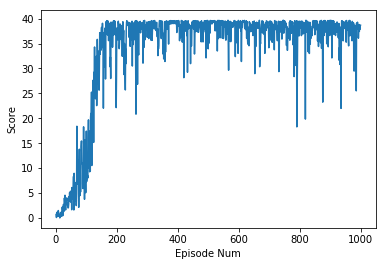

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode Num')
plt.show()

Finally, save the trained weights and close the environment down.

In [6]:
torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        
env.close()

### 3. Implementation Details

If you have any questions about the implementation details of this project please refer to the **Report.pdf** file included with this repository for a full explanation of both the algorithms and design decisions chosen.